## **Classification** 

Proses klasifikasi dengan membandingkan metode KNN dan Naive Bayes terhadap data text bank yang bersumber dari kaggle (untuk datasetnya bisa diunduh terlebih dahulu dari akun github ini di folder DTI_Assigment dengan nama file dataset yang berformat csv.



### ***Proses Persiapan Data*** 

Dengan melakukan pembacaan data, analisis infromasi data untuk keperluan selanjutnya yaitu proses pra-pemrosesan data

In [1]:
#Import Library untuk pemrosesan data 
import pandas as pd
import csv

In [2]:
#Pembacaan File Dataset 
df_bank = pd.read_csv('dataset_bank.csv')
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
#Melihat informasi data 
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
#Melihat informasi statistik dasar dari data
df_bank.describe().transpose() #kemudian melakukan pengubahan dari baris menjadi kolom

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [5]:
#Mengecek apakah ada missing value (data yang hilang)
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### ***Proses Pra Pemrosesan Data***
Proses untuk mengelola data sebelum dilakukan klasifikasi data. Karena terkadang data yang tersedia tidak sesuai sehingga perlu dilakukan penyesuaian agar bisa dilakukan proses selajutnya.

In [6]:
#mengecek isi data dari kolom deposit
df_bank["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [7]:
#melakukan encode data untuk merubah variabel kategori menjadi numerik agar bisa dilakukan proses klasifikasi
cleanup_num = {"deposit":{"yes": 1, "no": 0}}

In [8]:
#menggati dataset data dengan kolom deposit yang sudah di encode sebelumnya
df_bank.replace(cleanup_num, inplace=True)
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


In [9]:
#pengecekkan kembali informasi data 
#untuk memastikan proses encode kolom deposit sudah berhasil atau belum
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit       int64
dtype: object

In [10]:
#Proses ENCODE dengan metode OneHotEncoder
#Import library
from sklearn.preprocessing import OneHotEncoder

#import encoder
encoder = OneHotEncoder(sparse=False)

#Memasukkan kolom yang berisi data kategorik dan akan diubah menjadi numerik
df_encoded = pd.DataFrame(encoder.fit_transform(df_bank[['job','marital', 'education', 'default', 'housing','loan','contact','month','previous','poutcome']]))
df_encoded.columns = encoder.get_feature_names(['job','marital', 'education', 'default', 'housing','loan','contact','month','previous','poutcome'])

#Penggantian data 
df_bank.drop(['job','marital', 'education', 'default', 'housing','loan','contact','month','previous','poutcome'] ,axis=1, inplace=True)
df_encoded= pd.concat([df_bank, df_encoded], axis=1)

#Penampilan data setelah dilakukan proses encode
df_encoded

,age,balance,day,duration,campaign,pdays,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,...,month_oct,month_sep,previous_0,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6,previous_7,previous_8,previous_9,previous_10,previous_11,previous_12,previous_13,previous_14,previous_15,previous_16,previous_17,previous_18,previous_19,previous_20,previous_21,previous_22,previous_23,previous_26,previous_27,previous_28,previous_29,previous_30,previous_37,previous_40,previous_41,previous_55,previous_58,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,45,5,1467,1,-1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,1270,5,1389,1,-1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,2476,5,579,1,-1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,184,5,673,2,-1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,733,16,83,4,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,32,29,19,156,2,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,8,9,2,172,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0

In [11]:
#Pemilihan variabel dependen dan independen
#Variabel independen semua kolom selain deposit
x = df_encoded.drop(["deposit"], axis = 1) #feature
#Variabel dependen
y = df_encoded["deposit"] #target

In [12]:
#pembagian menjadi data Training dan testing (75:25)
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test  = train_test_split(x , y, shuffle = True, test_size=0.25, random_state=1)

#menampilkan banyak data train dan data test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8371, 84)
(2791, 84)
(8371,)
(2791,)


In [13]:
#menampilkan data
X_test

,age,balance,day,duration,campaign,pdays,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,...,month_oct,month_sep,previous_0,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6,previous_7,previous_8,previous_9,previous_10,previous_11,previous_12,previous_13,previous_14,previous_15,previous_16,previous_17,previous_18,previous_19,previous_20,previous_21,previous_22,previous_23,previous_26,previous_27,previous_28,previous_29,previous_30,previous_37,previous_40,previous_41,previous_55,previous_58,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
8422,31,554,5,94,1,-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9226,43,514,20,34,2,-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8162,26,277,14,514,2,-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4337,39,91,3,213,1,185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2438,40,0,6,131,2,98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,27,16,3,54,3,-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
706,60,0,7,401,3,-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10998,33,-132,18,170,6,-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6466,51,-15,25,212,2,-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,

### ***Klasifikasi dengan Naive Bayes***

Metode naive bayes merupakan metode klasifikasi sederhana dengan menerapkan probabilitas dan statistika. Yaitu dengan memprediksi peluang masa depan berdasarkan pengalaman dimasa sebelumnya.

In [28]:
#Import library naive bayes
from sklearn.naive_bayes import GaussianNB 

#Import Model Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

#Penyimpanan variabel prediksi
y_pred_nb= nb.predict(X_test)

In [29]:
#import library untuk confussion matrix
from sklearn import metrics

In [30]:
#Perhitungan confussion matrix sebagai model evaluasi
cm_nb = metrics.confusion_matrix(y_test, y_pred_nb)
cm_nb

array([[1194,  263],
       [ 580,  754]])

In [31]:
#Menampilkan Accuracy, Precision, Recall dengan naive bayes
acc_nb = metrics.accuracy_score(y_test, y_pred_nb)
prec_nb = metrics.precision_score(y_test, y_pred_nb)
rec_nb = metrics.recall_score(y_test, y_pred_nb)
f1_nb = metrics.f1_score(y_test, y_pred_nb)
kappa_nb = metrics.cohen_kappa_score(y_test, y_pred_nb)

print("Accuracy:", acc_nb)
print("Precision:", prec_nb)
print("Recall:", rec_nb)
print("F1 Score:", f1_nb)
print("Cohens Kappa Score:", kappa_nb)

Accuracy: 0.697957721246865
Precision: 0.7413962635201573
Recall: 0.5652173913043478
F1 Score: 0.641429179072735
Cohens Kappa Score: 0.3886073926437361


In [32]:
#Import library untuk proses Visualization
import matplotlib.pyplot as plt

#Pengaturan Set Size dan Style visualisasi
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

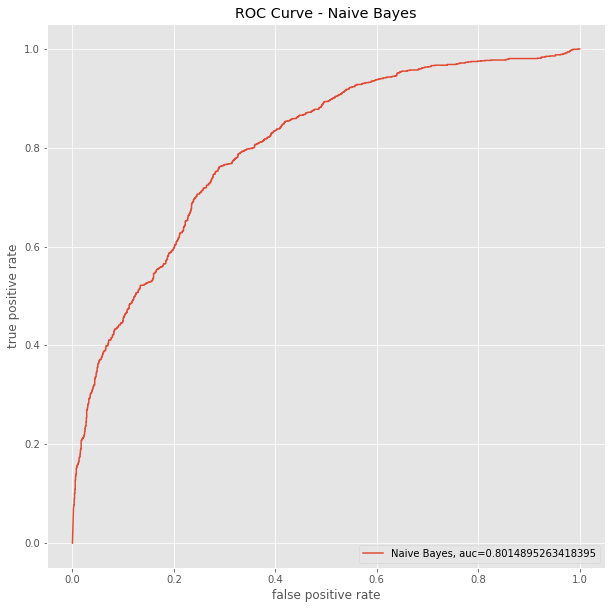

In [33]:
#ROC Curve
y_pred_nb_prob = nb.predict_proba(X_test)[::,1]
fprnb, tprnb, _ = metrics.roc_curve(y_test,  y_pred_nb_prob)
aucnb = metrics.roc_auc_score(y_test, y_pred_nb_prob)
plt.plot(fprnb,tprnb,label="Naive Bayes, auc="+str(aucnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

### ***Proses Klasifikasi dengan KNN***

KNN adalah metode klasifikasi berdasarkan data pembelajaran (train dan test), yang diambil dari mayoritas kedekatan jarak kategori.

In [34]:
#imort library KNN
from sklearn.neighbors import KNeighborsClassifier

#import model knn dengan nilai k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
#penyimpanan data proses klasifikasi KNN
y_pred = knn.predict(X_test)

In [36]:
#Menampilkan Confussion Matrix
cm_knn = metrics.confusion_matrix(y_test, y_pred)
cm_knn

array([[1137,  320],
       [ 370,  964]])

In [37]:
#Menampilkan Accuracy, Precision, Recall
acc_knn = metrics.accuracy_score(y_test, y_pred)
prec_knn = metrics.precision_score(y_test, y_pred)
rec_knn = metrics.recall_score(y_test, y_pred)
f1_knn = metrics.f1_score(y_test, y_pred)
kappa_knn = metrics.cohen_kappa_score(y_test, y_pred)

print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("F1 Score:", f1_knn)
print("Cohens Kappa Score:", kappa_knn)

Accuracy: 0.7527767825152275
Precision: 0.7507788161993769
Recall: 0.7226386806596702
F1 Score: 0.7364400305576775
Cohens Kappa Score: 0.5038063695948032


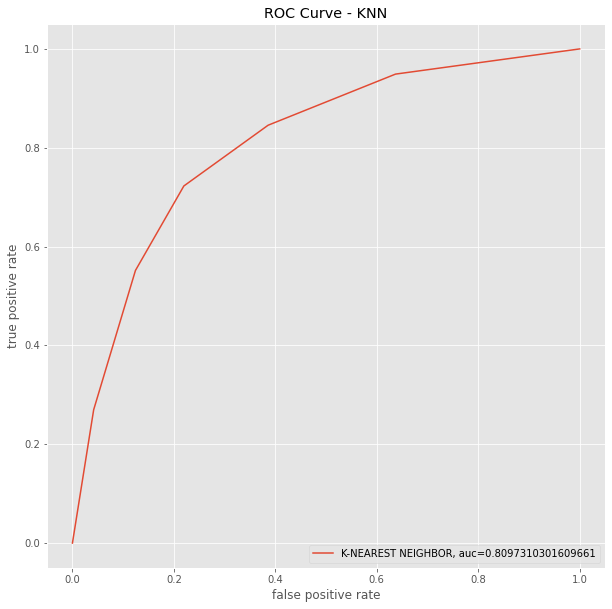

In [38]:
#ROC Curve
y_pred_prob_knn = knn.predict_proba(X_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_prob_knn)
aucknn = metrics.roc_auc_score(y_test, y_pred_prob_knn)
plt.plot(fprknn,tprknn,label="K-NEAREST NEIGHBOR, auc="+str(aucknn))
plt.title('ROC Curve - KNN')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

### ***Hasil Perbandingan Metode***

Dari kedua metode yang telah dijalankan terbukti jika klasifikasi KNN memiliki nilai akurasi yang lebih baik dibandingkan dengan naive bayes. 

In [39]:
#Perbandingan Model Performance
print("KNN Accuracy =",acc_knn)
print("KNN Precision =",prec_knn)
print("KNN Recall =",rec_knn)
print("KNN F1-Score =", f1_knn)
print("_______________________")
print("Naive Bayes Accuracy =", acc_nb)
print("Naive Bayes Precision =", prec_nb)
print("Naive Bayes Recall =", rec_nb)
print("Naive Bayes F1-Score =", f1_nb)

KNN Accuracy = 0.7527767825152275
KNN Precision = 0.7507788161993769
KNN Recall = 0.7226386806596702
KNN F1-Score = 0.7364400305576775
_______________________
Naive Bayes Accuracy = 0.697957721246865
Naive Bayes Precision = 0.7413962635201573
Naive Bayes Recall = 0.5652173913043478
Naive Bayes F1-Score = 0.641429179072735


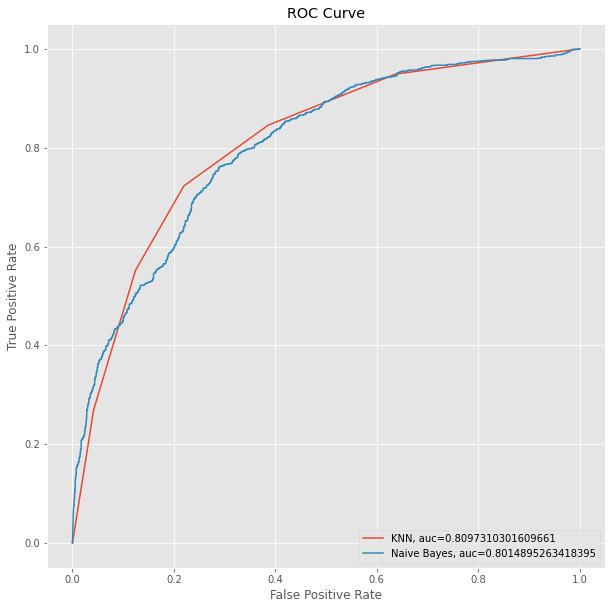

In [40]:
# Comparing ROC Curve
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### ***Data Hasil Prediksi***

In [41]:
#pembuatan data frame 
df_compare = X_test.copy()
df_compare['ActualClass'] = y_test
df_compare['KNN'] = y_pred
df_compare['NaiveBayes'] = y_pred_nb

In [42]:
df_compare

,age,balance,day,duration,campaign,pdays,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,...,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6,previous_7,previous_8,previous_9,previous_10,previous_11,previous_12,previous_13,previous_14,previous_15,previous_16,previous_17,previous_18,previous_19,previous_20,previous_21,previous_22,previous_23,previous_26,previous_27,previous_28,previous_29,previous_30,previous_37,previous_40,previous_41,previous_55,previous_58,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ActualClass,KNN,NaiveBayes
8422,31,554,5,94,1,-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
9226,43,514,20,34,2,-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
8162,26,277,14,514,2,-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0
4337,39,91,3,213,1,185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1
2438,40,0,6,131,2,98,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,27,16,3,54,3,-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
706,60,0,7,401,3,-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
10998,33,-132,18,170,6,-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
6466,51,-15,25,212,2,-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [43]:
#Prediksi dengan KNN
new_predicted_knn = pd.DataFrame(knn.predict(x), columns = ['Deposit_KNN'])
new_predicted_knn.reset_index()
new_predicted_knn

,Deposit_KNN
0,1
1,1
2,1
3,1
4,1
...,...
11157,0
11158,0
11159,0
11160,0


In [44]:
#Prediksi dengan Naive Bayes Classifier
new_predicted_nb = pd.DataFrame(nb.predict(x), columns = ['Deposit_naive_bayes'])
new_predicted_nb.reset_index()
new_predicted_nb

,Deposit_naive_bayes
0,0
1,1
2,0
3,0
4,0
...,...
11157,0
11158,0
11159,0
11160,1


In [45]:
# Show Prediction Result
pred = pd.concat([df_bank, new_predicted_knn, new_predicted_nb], axis=1)
pred

,age,balance,day,duration,campaign,pdays,deposit,Deposit_KNN,Deposit_naive_bayes
0,59,2343,5,1042,1,-1,1,1,0
1,56,45,5,1467,1,-1,1,1,1
2,41,1270,5,1389,1,-1,1,1,0
3,55,2476,5,579,1,-1,1,1,0
4,54,184,5,673,2,-1,1,1,0
...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,0
11158,39,733,16,83,4,-1,0,0,0
11159,32,29,19,156,2,-1,0,0,0
11160,43,0,8,9,2,172,0,0,1


In [46]:
#Penyimpanan data prediksi
df_compare.to_csv('bank_prediction1.csv', index=False)